In [ ]:
# import os
# os.chdir("/root/quytran/fin-gpt/fingpt")

In [ ]:
from IPython.display import Image, display
from langchain_core.messages import HumanMessage
from langgraph.graph import END, START, StateGraph

from app.assistant.common.agent import CommonAgent
from app.assistant.common.nodes import human_make_choice, retrieve_active_accounts
from app.assistant.term_deposit.common.conditional_edges import (
    branch_term_deposit_account,
    router_term_deposit_action,
)
from app.assistant.term_deposit.common.constant import (
    ACCOUNT_CHOICE_NODE,
    AVAILABLE_TERM_DEPOSIT_ACCOUNT_EDGE,
    AVAILABLE_TERM_DEPOSIT_ACCOUNT_NODE,
    AVAILABLE_TERM_DEPOSIT_EDGE,
    AVAILABLE_TERM_DEPOSIT_NODE,
    DEPOSIT_ACCOUNT_CHOICE_NODE,
    DEPOSIT_PRODUCT_CHOICE_NODE,
    EXTRACT_TERM_DEPOSIT_INFO_NODE,
    GET_CURRENT_BALANCE_NODE,
    GET_DEPOSIT_ACCOUNTS_NODE,
    GET_TERM_DEPOSITS_NODE,
    INSUFFICIENT_BALANCE_EDGE,
    INSUFFICIENT_BALANCE_NODE,
    KEEP_ASKING_EDGE,
    MULTIPLE_ACCOUNTS_EDGE,
    MULTIPLE_ACCOUNTS_NODE,
    NEW_TERM_EDGE,
    NO_ACCOUNT_EDGE,
    NO_ACCOUNT_HAVING_ENOUGH_BALANCE_EDGE,
    NO_ACCOUNT_HAVING_ENOUGH_BALANCE_NODE,
    NO_ACCOUNT_NODE,
    NO_AVAILABLE_TERM_DEPOSIT_ACCOUNT_EDGE,
    NO_AVAILABLE_TERM_DEPOSIT_ACCOUNT_NODE,
    NO_AVAILABLE_TERM_DEPOSIT_EDGE,
    NO_AVAILABLE_TERM_DEPOSIT_NODE,
    NOT_SUPPORT_ACTION_NODE,
    OTHER_EDGE,
    RENEW_TERM_EDGE,
    RETRIEVE_ACTIVE_ACCOUNTS_NODE,
    REVIEW_TERM_DEPOSIT_NODE,
    SINGLE_ACCOUNT_EDGE,
    SUFFICIENT_BALANCE_EDGE,
)
from app.assistant.term_deposit.common.nodes import (
    available_term_deposit,
    extract_term_deposit_info,
    get_term_deposits,
    no_available_term_deposit,
    not_support_action,
    review_term_deposit,
)
from app.assistant.term_deposit.common.state import (
    DepositAgentConfig,
    DepositAgentState,
    DepositAgentStateFields,
)
from app.assistant.term_deposit.new_term.conditional_edges import (
    branch_active_account,
    branch_current_balance,
    branch_term_deposit,
)
from app.assistant.term_deposit.new_term.nodes import (
    get_current_balance,
    insufficient_balance,
    multiple_accounts,
    no_account,
    no_account_having_enough_balance,
)
from app.assistant.term_deposit.renew_term.nodes import (
    available_term_deposit_account,
    get_term_deposit_accounts,
    no_available_deposit_account,
)
from app.core.context import RequestContext
from app.entity import ChatReqDto, ChatRespDto
from app.entity.chat_request import ChatReqAction
from app.entity.error import InvalidInputError
from app.utils.modified_langfuse_decorator import observe  # type: ignore

In [ ]:
# from langgraph.checkpoint.aiosqlite import AsyncSqliteSaver
# state_storage = "/root/quytran/fin-gpt/fingpt/app/data/term_deposit.sqlite"
# # Create the AsyncSqliteSaver
# amemory = AsyncSqliteSaver.from_conn_string(state_storage)

In [ ]:
# amemory

In [ ]:
# workflow = StateGraph(
#             state_schema=DepositAgentState,
#             # config_schema=DepositAgentConfig,
#         )
# workflow.add_node(EXTRACT_TERM_DEPOSIT_INFO_NODE, extract_term_deposit_info)
# workflow.add_node(RETRIEVE_ACTIVE_ACCOUNTS_NODE, retrieve_active_accounts)
# workflow.add_node(NO_ACCOUNT_NODE, no_account)
# workflow.add_node(MULTIPLE_ACCOUNTS_NODE, multiple_accounts)
# workflow.add_node(ACCOUNT_CHOICE_NODE, human_make_choice)
# workflow.add_node(GET_TERM_DEPOSITS_NODE, get_term_deposits)
# workflow.add_node(NO_AVAILABLE_TERM_DEPOSIT_NODE, no_available_term_deposit)
# workflow.add_node(AVAILABLE_TERM_DEPOSIT_NODE, available_term_deposit)
# workflow.add_node(DEPOSIT_PRODUCT_CHOICE_NODE, human_make_choice)
# workflow.add_node(GET_CURRENT_BALANCE_NODE, get_current_balance)
# workflow.add_node(INSUFFICIENT_BALANCE_NODE, insufficient_balance)
# workflow.add_node(DEPOSIT_ACCOUNT_CHOICE_NODE, human_make_choice)
# workflow.add_node(GET_DEPOSIT_ACCOUNTS_NODE, get_term_deposit_accounts)
# workflow.add_node(
#     NO_AVAILABLE_TERM_DEPOSIT_ACCOUNT_NODE, no_available_deposit_account
# )
# workflow.add_node(
#     AVAILABLE_TERM_DEPOSIT_ACCOUNT_NODE, available_term_deposit_account
# )
# workflow.add_node(REVIEW_TERM_DEPOSIT_NODE, review_term_deposit)
# workflow.add_node(
#     NO_ACCOUNT_HAVING_ENOUGH_BALANCE_NODE, no_account_having_enough_balance
# )

# workflow.add_node(NOT_SUPPORT_ACTION_NODE, not_support_action)

# workflow.add_edge(START, EXTRACT_TERM_DEPOSIT_INFO_NODE)
# workflow.add_conditional_edges(
#     EXTRACT_TERM_DEPOSIT_INFO_NODE,
#     router_term_deposit_action,
#     {
#         KEEP_ASKING_EDGE: END,
#         NEW_TERM_EDGE: RETRIEVE_ACTIVE_ACCOUNTS_NODE,
#         RENEW_TERM_EDGE: GET_DEPOSIT_ACCOUNTS_NODE,
#         OTHER_EDGE: NOT_SUPPORT_ACTION_NODE,
#     },
# )
# workflow.add_edge(NOT_SUPPORT_ACTION_NODE, END)
# # New term deposit
# workflow.add_conditional_edges(
#     RETRIEVE_ACTIVE_ACCOUNTS_NODE,
#     branch_active_account,
#     {
#         NO_ACCOUNT_EDGE: NO_ACCOUNT_NODE,
#         SINGLE_ACCOUNT_EDGE: GET_CURRENT_BALANCE_NODE,
#         MULTIPLE_ACCOUNTS_EDGE: MULTIPLE_ACCOUNTS_NODE,
#         NO_ACCOUNT_HAVING_ENOUGH_BALANCE_EDGE: NO_ACCOUNT_HAVING_ENOUGH_BALANCE_NODE,
#     },
# )

# workflow.add_edge(NO_ACCOUNT_NODE, END)
# workflow.add_edge(NO_ACCOUNT_HAVING_ENOUGH_BALANCE_NODE, END)
# workflow.add_edge(MULTIPLE_ACCOUNTS_NODE, ACCOUNT_CHOICE_NODE)
# workflow.add_edge(ACCOUNT_CHOICE_NODE, GET_CURRENT_BALANCE_NODE)
# workflow.add_conditional_edges(
#     GET_CURRENT_BALANCE_NODE,
#     branch_current_balance,
#     {
#         SUFFICIENT_BALANCE_EDGE: GET_TERM_DEPOSITS_NODE,
#         INSUFFICIENT_BALANCE_EDGE: INSUFFICIENT_BALANCE_NODE,
#     },
# )

# workflow.add_edge(INSUFFICIENT_BALANCE_NODE, END)
# workflow.add_conditional_edges(
#     GET_TERM_DEPOSITS_NODE,
#     branch_term_deposit,
#     {
#         AVAILABLE_TERM_DEPOSIT_EDGE: AVAILABLE_TERM_DEPOSIT_NODE,
#         NO_AVAILABLE_TERM_DEPOSIT_EDGE: NO_AVAILABLE_TERM_DEPOSIT_NODE,
#     },
# )
# workflow.add_edge(NO_AVAILABLE_TERM_DEPOSIT_NODE, END)
# workflow.add_edge(AVAILABLE_TERM_DEPOSIT_NODE, DEPOSIT_PRODUCT_CHOICE_NODE)
# workflow.add_edge(DEPOSIT_PRODUCT_CHOICE_NODE, REVIEW_TERM_DEPOSIT_NODE)

# # Renew term deposit
# workflow.add_conditional_edges(
#     GET_DEPOSIT_ACCOUNTS_NODE,
#     branch_term_deposit_account,
#     {
#         AVAILABLE_TERM_DEPOSIT_ACCOUNT_EDGE: AVAILABLE_TERM_DEPOSIT_ACCOUNT_NODE,
#         NO_AVAILABLE_TERM_DEPOSIT_ACCOUNT_EDGE: NO_AVAILABLE_TERM_DEPOSIT_ACCOUNT_NODE,
#     },
# )
# workflow.add_edge(
#     AVAILABLE_TERM_DEPOSIT_ACCOUNT_NODE, DEPOSIT_ACCOUNT_CHOICE_NODE
# )
# workflow.add_edge(DEPOSIT_ACCOUNT_CHOICE_NODE, GET_TERM_DEPOSITS_NODE)
# workflow.add_edge(NO_AVAILABLE_TERM_DEPOSIT_ACCOUNT_NODE, END)
# workflow.add_edge(REVIEW_TERM_DEPOSIT_NODE, END)

# graph = workflow.compile(checkpointer=amemory, interrupt_before=[ACCOUNT_CHOICE_NODE, DEPOSIT_PRODUCT_CHOICE_NODE, DEPOSIT_ACCOUNT_CHOICE_NODE])
# display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
# from app.core.config import settings
# from app.entity import AuthReqDto, AuthRespDto, AuthUserType
# from app.auth.auth_service import AuthService
# from app.core.context import RequestContext
# from uuid import uuid4
# from langchain_openai import AzureChatOpenAI
# from app.prompt.prompt_service import PromptService
# ps = PromptService()
# llm_model = AzureChatOpenAI(azure_deployment=settings.azure_openai_deployment)
# request_context = RequestContext(req_id=str(uuid4()))
# async def get_auth_response() -> AuthRespDto:
#     auth_req_dto = AuthReqDto(
#         username=settings.ebp_test_account_username,
#         password=settings.ebp_test_account_password,
#         user_type=AuthUserType.RETAIL,
#     )
#     auth_service = AuthService()
#     auth_resp_dto = await auth_service.login(ctx=request_context, req=auth_req_dto)
#     return auth_resp_dto

In [ ]:
# llm_model

In [ ]:
# ps

In [ ]:
# auth_response = await get_auth_response()

In [ ]:

# agent_configurable = {
#     "ebp_access_token": auth_response.access_token,
#     "ebp_cookie": auth_response.cookie,
#     "ebp_edge_domain": auth_response.edge_domain,
#     "ctx": request_context,
#     "llm_model": llm_model,
#     "ps": ps,
# }
# agent_configurable

In [ ]:
# thread_id = str(uuid4())
# config = {"configurable": {"thread_id": thread_id} | agent_configurable}
# input_message="Open a term deposit with $8000 for 6 months"
# # input_message="Renew term deposit"
# async for event in graph.astream(
#     {"messages": [input_message]}, config, stream_mode="values"
# ):
#     event["messages"][-1].pretty_print()

In [ ]:
# current_state = await graph.aget_state(config=config)
# current_state

In [ ]:
# current_account = current_state.values.get("active_accounts")
# current_account

In [ ]:
# selected_account_id = "b829e1a2-e880-495f-a8e7-220a919f760d"
# await graph.aupdate_state(
#     config=config,
#     values={
#         "active_accounts": {selected_account_id: current_account[selected_account_id]},
#         "messages": HumanMessage(content=current_account[selected_account_id].name),
#     },
#     as_node=ACCOUNT_CHOICE_NODE,
# )

In [ ]:
# current_state = await graph.aget_state(config=config)
# current_state

In [ ]:
# async for event in graph.astream(None, config, stream_mode="values"):
#     event["messages"][-1].pretty_print()

In [ ]:
# current_state = await graph.aget_state(config=config)
# current_state

In [ ]:
# term_deposit_products = current_state.values.get("term_deposit_products")
# term_deposit_products

In [ ]:
# term_choice = term_deposit_products["a1b2c3d4-e5f6-7890-abcd-ef1234567890"]
# term_choice_id = term_choice.id

In [ ]:
# await graph.aupdate_state(
#     config=config,
#     values={
#         "term_deposit_products": {term_choice_id: term_deposit_products[term_choice_id]},
#         "messages": HumanMessage(content=term_deposit_products[term_choice_id].name),
#     },
#     as_node="deposit_product_choice",
# )

In [ ]:
# async for event in graph.astream(None, config, stream_mode="values"):
#     event["messages"][-1].pretty_print()

# Improve

In [2]:
import os

os.chdir("/root/quytran/fin-gpt/fingpt")

In [2]:
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage, ToolMessage
from langgraph.prebuilt import ToolNode
from langchain_core.runnables.config import RunnableConfig
import requests
import uuid
import os
from app.core.config import settings
import time
from dotenv import load_dotenv

load_dotenv()

True

## Acquire auth info

In [3]:
HOST = "https://app.stg.sdbxaz.azure.backbaseservices.com/api/fin-gpt"
LOGIN_API = "/v1/auth/login"
request_id = str(uuid.uuid4())
sanbox_key = os.environ.get("SANDBOX_API_KEY")
user_name = os.environ.get("EBP_TEST_ACCOUNT_USERNAME")
password = os.environ.get("EBP_TEST_ACCOUNT_PASSWORD")
print(sanbox_key)
print(user_name)
header = {"x-request-id": request_id, "X-SDBXAZ-API-KEY": sanbox_key}
r = requests.post(
    HOST + LOGIN_API,
    headers=header,
    json={"username": user_name, "password": password, "user_type": "retail"},
)
# print(r)
result = r.json()
access_token = result.get("access_token")
cookie = result.get("cookie")
cookie, access_token

bb-c1409daf-eswz-3440-uaze-9b32890bae81
sdbxaz-stg-sara


('USER_CONTEXT=eyJraWQiOiJaNXB5dkwvcUxhQXJHdmJORjdCbXVQZVBTVDhHQjlQcE9HRG9GcGVuYjE4PSIsImN0eSI6IkpXVCIsImVuYyI6IkExMjhDQkMtSFMyNTYiLCJhbGciOiJkaXIifQ..NxY12Iowz-GByHB7zETGZw.Yog9wohccGsQ_5FGdSKQQYbTve3FNfbgpk678yarXdJNZADzEaBqF2O4H-08UeyETR1sNif-HbLUDOGu0Yogk37tNhtDEj4wL8m_b3kZmEMyzVN8ABdNaR7lVQeU-1XInOS6uOF-6_4HfvtnxGdvN0NXl2vblv_7F2xWL3iik_eKXmq5UBc5mO6PImblQ8C-_rrzs442OHPPZZchvT9hZhwvRmDWX0giE8bIPVcKueM2DkGcb2K9mHhI2nkG0uGX3Y6aQQo2fTIiRlXbH7Wi49gZHRL1Wtw_U4xGvTfK1YQNO0Tabu9YFLGZ2yKjB5a_1K-I9PGcqjjZarn8FeviHg.W74_LtzQddpINmPUAF_6mA; XSRF-TOKEN=27a4aea4-b299-4b55-8d32-c098fa52ddeb; ASLBSA=0003b0a32145fc09962dba6e74eeb77cf9de9b170f70ae63d7da4e6fdd120ace873d; ASLBSACORS=0003b0a32145fc09962dba6e74eeb77cf9de9b170f70ae63d7da4e6fdd120ace873d',
 'eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJLRUxUODRfbFJ3QTdqSklFRnFBcEJPTVI4MnBkdF9QLUxoZy1mWlo4cGlrIn0.eyJleHAiOjE3MjczMzQ2NzYsImlhdCI6MTcyNzMzMjg3NiwianRpIjoiNTNiY2M0M2UtYmZkYi00YTUxLTg0OGYtNGFkMWJhMmZlNWYyIiwiaXNzIjoiaHR0cHM6Ly9pZGVudGl0e

In [4]:
from langchain_openai import AzureChatOpenAI
from app.assistant.constant import (
    CONTEXT_KEY,
    EBP_ACCESS_TOKEN_KEY,
    EBP_COOKIE_KEY,
    EBP_EDGE_DOMAIN_KEY,
    LLM_MODEL_KEY,
    THREAD_ID_KEY,
)
from app.core.context import RequestContext


def get_config(thread_id, cookie, access_token):
    config = RunnableConfig(
        configurable={
            EBP_ACCESS_TOKEN_KEY: access_token,
            EBP_COOKIE_KEY: cookie,
            EBP_EDGE_DOMAIN_KEY: settings.ebp_edge_domain,
            THREAD_ID_KEY: thread_id,
            CONTEXT_KEY: RequestContext(thread_id),
            LLM_MODEL_KEY: AzureChatOpenAI(
                azure_deployment=settings.azure_openai_deployment
            ),
        }
    )
    return config

In [5]:
from typing import Annotated
from app.assistant.base_agent_config import extract_bb_retail_api_config
from app.assistant_v2.constant import CONFIGURABLE_CONTEXT_KEY
from app.assistant.term_deposit.common.state import (
    DepositAgentStateFields,
    DepositAgentState,
    DepositAgentConfig,
)
from app.assistant.term_deposit.common.nodes import _update_term_deposit
from app.entity.bb_api import BbQueryPaging
from langgraph.prebuilt import InjectedState
from app.bb_retail.request import (
    list_accounts,
    list_td_products,
    list_term_deposit_accounts,
)
from app.entity import TermUnit
from app.assistant.term_deposit.renew_term.nodes import _update_term_account


@tool
async def notice_deposit_amount(
    deposit_amount: float,
):
    """
    Call this function to get the deposit amount for creating (opening) new term deposit.
    """
    return str(deposit_amount)


@tool
async def notice_term_number(
    term_number: int,
):
    """
    Call this function to get the term number.
    """
    return str(term_number)


@tool
async def notice_term_unit(
    term_unit: str,
):
    """
    Call this function to get the term unit.
    """
    return str(term_unit)


@tool
async def get_account(config: RunnableConfig):
    "Call to get list of user account"
    config_data = config.get(CONFIGURABLE_CONTEXT_KEY, {})
    ctx: RequestContext = config_data[CONTEXT_KEY]
    logger = ctx.logger()
    logger.debug("Retrieving contact list...")
    api_config = extract_bb_retail_api_config(config_data)
    accounts = await list_accounts(ctx, api_config)
    message = [entity.json() for entity in accounts]
    config["metadata"]["last_tool"] = "get_account"
    return str(message)


@tool
async def get_term_deposit_product(
    deposit_amount: str,
    state: Annotated[dict, InjectedState],
    config: RunnableConfig,
):
    "Call to get list of term deposit products"
    config_data: DepositAgentConfig = config.get(CONFIGURABLE_CONTEXT_KEY, {})  # type: ignore
    ctx: RequestContext = config_data[CONTEXT_KEY]
    logger = ctx.logger()
    logger.debug("Retrieving all term deposit products ...")

    term_deposit_products = await list_td_products(ctx=ctx)

    logger.debug(
        f"Retrieving {len(term_deposit_products)} term deposit products"  # type: ignore
    )

    updated_term_deposit_products = _update_term_deposit(
        deposit_amount=float(deposit_amount),
        list_term_deposit=term_deposit_products,
    )

    term_unit = state.get(DepositAgentStateFields.TERM_UNIT)
    term_number = state.get(DepositAgentStateFields.TERM_NUMBER)
    if term_unit and term_number:
        updated_term_deposit_products = {
            key: value
            for key, value in updated_term_deposit_products.items()
            if value.term_unit == term_unit and value.term_number == term_number
        }

    logger.info("Returning TD products list...")

    message = [entity.json() for entity in updated_term_deposit_products.values()]
    config["metadata"]["last_tool"] = "get_term_deposit_product"
    return str(message)


@tool(parse_docstring=True)
async def get_term_deposit_account(
    deposit_amount: str, state: Annotated[dict, InjectedState], config: RunnableConfig
):
    """Call to get list of term deposit accounts

    Args:
        deposit_amount: Deposit amount. Can be an empty string
        state: state of the agent
        config: config of the agent
    """
    if deposit_amount.strip() == "":
        deposit_amount = None
    elif deposit_amount.strip() != "":
        deposit_amount = float(deposit_amount)

    config_data: DepositAgentConfig = config.get(CONFIGURABLE_CONTEXT_KEY, {})  # type: ignore
    ctx = config_data[CONTEXT_KEY]

    logger = ctx.logger()
    logger.info("Available term deposit accounts...")
    logger.info(f"Deposit amount: {deposit_amount}")
    api_config = extract_bb_retail_api_config(config_data=config_data)

    term_deposit_accounts = await list_term_deposit_accounts(ctx=ctx, config=api_config)

    logger.info("Filtering term deposit accounts ...")

    filtered_accounts = _update_term_account(
        deposit_amount=deposit_amount,
        list_term_deposit_account=term_deposit_accounts,
    )
    logger.info(f"Filtered accounts: {filtered_accounts}")
    message = [entity.json() for entity in filtered_accounts.values()]
    config["metadata"]["last_tool"] = "get_term_deposit_account"

    return str(message)


@tool
async def provide_deposit_amount_message_branch_renew(
    state: Annotated[dict, InjectedState]
):
    "Call to provide deposit amount message for renew term deposit if user don't specify deposit amount"
    deposit_amount = state[DepositAgentStateFields.DEPOSIT_AMOUNT]
    message = f"This account has {deposit_amount}$ deposit amount"
    return {"messages": [message]}


tool_node = ToolNode(
    [
        get_account,
        get_term_deposit_product,
        get_term_deposit_account,
        provide_deposit_amount_message_branch_renew,
        notice_deposit_amount,
        notice_term_number,
        notice_term_unit,
    ]
)

In [6]:
THREAD_ID = "thread_18"
model = (
    get_config(thread_id=THREAD_ID, cookie=cookie, access_token=access_token)
    .get(CONFIGURABLE_CONTEXT_KEY)
    .get(LLM_MODEL_KEY)
)
model

AzureChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7f1b05db7d50>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7f1a5f350d90>, root_client=<openai.lib.azure.AzureOpenAI object at 0x7f1a60e7a990>, root_async_client=<openai.lib.azure.AsyncAzureOpenAI object at 0x7f1a5f358950>, deployment_name='gpt-4-32k-september')

In [7]:
model.invoke(input="How the weather today")

AIMessage(content="As an AI, I don't have real-time data or location services, so I can't provide current weather updates. You can check a reliable weather website or app for this information.", response_metadata={'token_usage': {'completion_tokens': 37, 'prompt_tokens': 11, 'total_tokens': 48, 'completion_tokens_details': None}, 'model_name': 'gpt-4-32k', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {}}, id='run-e97d8f65-1bd2-4f74-9126-aae003c8c417-0', usage_metadata={'input_tokens': 11, 'output_tokens': 37, 'total_tokens': 48})

In [8]:
t = ToolMessage(content="dsadasd", name="dsadsada", tool_call_id="sadsadsa")
t

ToolMessage(content='dsadasd', name='dsadsada', tool_call_id='sadsadsa')


## Test workflow

In [42]:

import json
from app.entity.term_deposit import (
    ActiveAccount,
    TermDepositProduct,
    TermDepositAccount,
)
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import ToolMessage
from app.entity.term_deposit import AccountIdentification


def should_call_HIL(state, config):
    term_deposit_products = state.get(DepositAgentStateFields.TERM_DEPOSIT_PRODUCTS, {})
    term_deposit_accounts = state.get(DepositAgentStateFields.TERM_DEPOSIT_ACCOUNTS, {})
    accounts = state.get(DepositAgentStateFields.ACTIVE_ACCOUNTS, {})
    deposit_amount = state.get(DepositAgentStateFields.DEPOSIT_AMOUNT, 0)

    print(f"TD product: {term_deposit_products}")
    print(f"Accounts: {accounts}")
    print(f"TD accounts: {term_deposit_accounts}")
    if len(term_deposit_accounts) > 0:
        available_term_deposit_accounts = [
            account.id
            for account in term_deposit_accounts.values()
            if account.is_renewable is True and account.is_mature is True
        ]
    else:
        available_term_deposit_accounts = []

    if len(term_deposit_products) > 0:
        available_term_deposit_products = [
            product.id
            for product in term_deposit_products.values()
            if product.is_available is True
        ]
    else:
        available_term_deposit_products = []

    if len(accounts) > 0:
        suffficient_balance_accounts = [
            account.id
            for account in accounts.values()
            if account.available_balance >= deposit_amount
        ]
    else:
        suffficient_balance_accounts = []

    if (
        len(accounts) == 1
        and len(term_deposit_products) == 1
        or len(term_deposit_accounts) == 1
        and len(term_deposit_products) == 1
    ):
        print("Next node: review")
        return "review"

    if len(available_term_deposit_accounts) == 1:
        if available_term_deposit_products:
            print("Next node: select_term_deposit_product")
            return "select_term_deposit_product"
        else:
            print("Next node: end")
            return "end"

    if available_term_deposit_accounts:
        print("Next node: select_term_deposit_account")
        return "select_term_deposit_account"

    if len(suffficient_balance_accounts) == 1:
        if available_term_deposit_products:
            print("Next node: select_term_deposit_product")
            return "select_term_deposit_product"
        else:
            print("Next node: end")
            return "end"

    if suffficient_balance_accounts:
        print("Next node: select_account")
        return "select_account"
    # if len(available_term_deposit_products) >= 1:
    #     print("Next node: select_term_deposit_product")
    #     return "select_term_deposit_product"
    print("Next node: end")
    return "end"


def should_continue(state, config):
    messages = state["messages"]
    last_message = messages[-1]
    if not last_message.tool_calls:
        return should_call_HIL(state, config)
    else:
        return "call_tool"


tools = [
    get_term_deposit_product,
    get_term_deposit_account,
    get_account,
    provide_deposit_amount_message_branch_renew,
    notice_deposit_amount,
    notice_term_number,
    notice_term_unit,
]
system_prompt = """
You are a helpful AI assistant guiding the user through the create (open) new term deposit. Use the provided tools to proceed step by step.

## If user request create (open) new term deposit, follow these below steps:
1. Extract deposit amount, term number and term unit from the user's query. If deposit amount is missing, keep asking. If term number and term unit are missing, just pass.
- deposit_amount: float
- term_number: int
- term_unit: str, enum values: ["Y", "M", "W", "D"]
2. Always call tool to notice the deposit amount for creating (opening) new term deposit.
3. Always call tool to notice the term unit if term unit exist, otherwise no need to call.
4. Always call tool to notice the term number if term number exist, otherwise no need to call.
5. Always call tool to retrieve a list of the user's accounts. If there are multiple accounts have sufficient available balance (available balance >= deposit amount), you must always ask the user to choose one. If all accounts have insufficient available balance, ask the user to check their balance and try again later.
6. Once an account is chosen (must wait until user choose account), always call tool to retrieve a list of term deposit products. If there are available term deposit products (deposit amount > minimum required balance), you must always ask the user to choose one. If there is no available term deposit product, ask the user to increase the deposit amount and try again later.
7. Review and confirm all the selected information.
     
## If user request renew term deposit, follow these below steps:
1. Extract deposit amount, term number and term unit from the user's query. If user don't provide deposit amount, term number and term unit, just pass to next step, no need to ask the user to provide these information.
- deposit_amount: float
- term_number: int
- term_unit: str, enum values: ["Y", "M", "W", "D"]
2. Always call tool to notice the deposit amount for renew term deposit if deposit amount exist, otherwise no need to call.
3. Always call tool to notice the term unit if term unit exist, otherwise no need to call.
4. Always call tool to notice the term number if term number exist, otherwise no need to call.
5. Always call tool to retrieve a list of term deposit accounts. If there are available term deposit accounts (is_mature is True and is_renewable is True), you must always ask the user to choose one. If there is no available term deposit accounts, just response you don't have any term deposit accounts satisfied your request.
6. If user don't specify deposit amount but have already choosen a term deposit account, always call tool to provide deposit amount message, otherwise no need to call.
7. Once a term deposit account is chosen (must wait until user choose a term deposit account), always call tool to retrieve a list of term deposit products. If there are available term deposit products (deposit amount > minimum required balance), you must always ask the user to choose one. If there is no available term deposit product, ask the user to increase the deposit amount and try again later.
8. Review and confirm all the selected information.

NOTE: 
- Keep the response simple and concise. Avoid listing too much information.
- Data from tools are one-time used, always call necessary tool to keep your data up-to-date before reply. DO NOT USE OUTDATED DATA although user mentions previous data again, for example:
  - User: Create a term deposit 15$
  -> Call tool to get account information.
  -> Call tool to get term deposit product information.
  - User: Change deposit amount to 500$.
  -> Call tool again to get the latest information of account instead of using outdated data. User MUST choose the account again, so please ask user to choose the account.
  -> Call tool again to get term deposit product information. User MUST choose the term deposit product again, so please ask user to choose the term deposit product. 
  - User: Sorry, I want to change to an other account
  -> Call tool again to get the latest information of account instead of using outdated data. User MUST choose the account again, so please ask user to choose the account.
  -> Call tool again to get term deposit product information. User MUST choose the term deposit product again, so please ask user to choose the term deposit product. 
  
Examples:
- User: Create a term deposit with $5000
  -> Call the tool to notice the deposit amount.
  -> Call the tool to get account information.
  -> If multiple accounts have sufficient balance, ask the user to choose one.
     - Example response: "You have multiple accounts with sufficient balance. Please choose one: [Account 1 has available balance 6000$, Account 2 has available balance 7000$]
  -> Once an account is chosen, call the tool to get term deposit product information.
  -> If term deposit products are available, ask the user to choose one.
     - Example response: "Please choose a term deposit product: [Product 1: 6 months, 5% interest, Product 2: 12 months, 6% interest]"
  -> Review and confirm the selected information.
     - Example response: "You have chosen Account 1 and Product 1. Please confirm to proceed."
You have access to the following tools: {tool_names}.
"""
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
prompt = prompt.partial(tool_names=", ".join([tool.name for tool in tools]))
# print(prompt)


async def call_model(state, config):
    messages = state["messages"]
    output = {}
    for message in messages[::-1]:
        if not isinstance(message, ToolMessage):
            break
        # print(f'Tool message: {message}')
        if isinstance(message, ToolMessage):
            if message.name == "get_term_deposit_product":
                term_deposit_products = eval(message.content)
                output[DepositAgentStateFields.TERM_DEPOSIT_PRODUCTS] = {
                    json.loads(term_deposit_product)["id"]: TermDepositProduct(
                        **json.loads(term_deposit_product)
                    )
                    for term_deposit_product in term_deposit_products
                }
            elif message.name == "get_account":
                accounts = eval(message.content)
                print(f"Accounts: {accounts}")
                output[DepositAgentStateFields.ACTIVE_ACCOUNTS] = {
                    json.loads(account)["id"]: ActiveAccount(**json.loads(account))
                    for account in accounts
                }
            elif message.name == "get_term_deposit_account":
                term_deposit_accounts = eval(message.content)
                output[DepositAgentStateFields.TERM_DEPOSIT_ACCOUNTS] = {
                    json.loads(term_deposit_account)["id"]: TermDepositAccount(
                        **json.loads(term_deposit_account)
                    )
                    for term_deposit_account in term_deposit_accounts
                }

            elif message.name == "notice_deposit_amount":
                output[DepositAgentStateFields.DEPOSIT_AMOUNT] = float(message.content)
            elif message.name == "notice_term_number":
                output[DepositAgentStateFields.TERM_NUMBER] = int(message.content)
            elif message.name == "notice_term_unit":
                output[DepositAgentStateFields.TERM_UNIT] = TermUnit(message.content)

    model_with_tools = prompt | model.bind_tools(tools)
    response = await model_with_tools.ainvoke({"messages": messages})
    # print(f"response from model_with_tools: {response}")
    output["messages"] = [response]
    # print(f"output: {output}")
    return output


async def human_choice(state, config):
    pass


async def review(state, config):
    return {"messages": state[DepositAgentStateFields.MESSAGES][-1]}


tool_node = ToolNode(tools)

In [43]:
from langgraph.checkpoint.aiosqlite import AsyncSqliteSaver

checkpointer = AsyncSqliteSaver.from_conn_string(
    "/root/quytran/fin-gpt/fingpt/app/data/term_deposit.sqlite"
)

In [44]:
from app.assistant.term_deposit.common.state import DepositAgentState
from langgraph.graph import END, START, StateGraph

workflow = StateGraph(DepositAgentState)
workflow.add_node("agent", call_model)
workflow.add_node("tool_action", tool_node)
workflow.add_node("select_term_deposit_product", human_choice)
workflow.add_node("select_term_deposit_account", human_choice)
workflow.add_node("select_account", human_choice)
workflow.add_node("review", review)


workflow.add_edge(START, "agent")
workflow.add_conditional_edges(
    "agent",
    should_continue,
    {
        "call_tool": "tool_action",
        "end": END,
        "select_term_deposit_product": "select_term_deposit_product",
        "select_term_deposit_account": "select_term_deposit_account",
        "select_account": "select_account",
        "review": "review",
    },
)
workflow.add_edge("tool_action", "agent")
workflow.add_edge("select_term_deposit_product", "agent")
workflow.add_edge("select_term_deposit_account", "agent")
workflow.add_edge("select_account", "agent")
workflow.add_edge("review", END)
app = workflow.compile(
    checkpointer=checkpointer,
    interrupt_before=[
        "select_account",
        "select_term_deposit_product",
        "select_term_deposit_account",
    ],
)

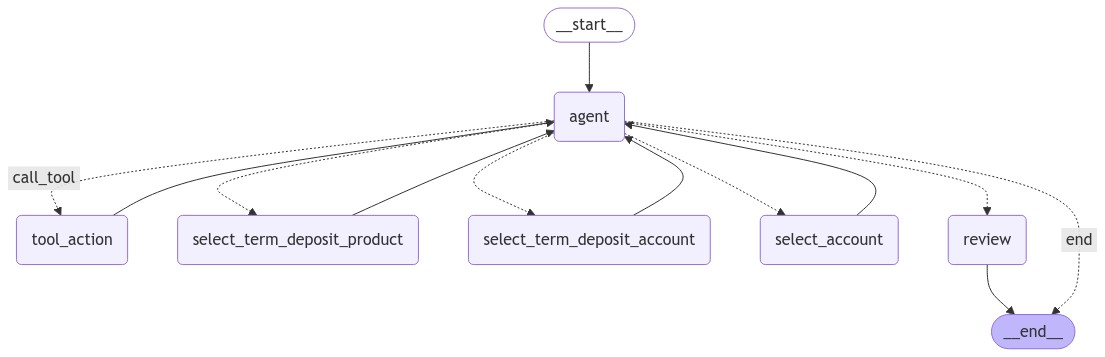

In [45]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)
    pass

In [58]:
THREAD_ID = "thread_92"
config = get_config(THREAD_ID, cookie, access_token)
config

{'configurable': {'ebp_access_token': 'eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJLRUxUODRfbFJ3QTdqSklFRnFBcEJPTVI4MnBkdF9QLUxoZy1mWlo4cGlrIn0.eyJleHAiOjE3MjczMzQ2NzYsImlhdCI6MTcyNzMzMjg3NiwianRpIjoiNTNiY2M0M2UtYmZkYi00YTUxLTg0OGYtNGFkMWJhMmZlNWYyIiwiaXNzIjoiaHR0cHM6Ly9pZGVudGl0eS5zdGcuc2RieGF6LmF6dXJlLmJhY2tiYXNlc2VydmljZXMuY29tL2F1dGgvcmVhbG1zL2N1c3RvbWVyIiwic3ViIjoiZmQ1NzdkMjItYzkxMi00MGNhLWFkODUtZDI2ZWE4ZjVjOWQwIiwidHlwIjoiQmVhcmVyIiwiYXpwIjoiYmItdG9vbGluZy1jbGllbnQiLCJzZXNzaW9uX3N0YXRlIjoiOWFlNjIyNDktZjEzYS00N2NjLWFkNTctMjVkMmYzYjY0ODU0IiwiYWNyIjoiMSIsImFsbG93ZWQtb3JpZ2lucyI6WyIqIl0sInNjb3BlIjoiZW1haWwgcHJvZmlsZSIsInNpZCI6IjlhZTYyMjQ5LWYxM2EtNDdjYy1hZDU3LTI1ZDJmM2I2NDg1NCIsImludWlkIjoiZmQ1NzdkMjItYzkxMi00MGNhLWFkODUtZDI2ZWE4ZjVjOWQwIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImxlaWQiOiI4YTgyODExZjkwZGEzNzI0MDE5MGRhNDAzNTM0MDA0ZiIsInVzZXJfbmFtZSI6InNkYnhhei1zdGctc2FyYSIsIm5hbWUiOiJTYXJhIFdpbGxpYW1zIiwicHJlZmVycmVkX3VzZXJuYW1lIjoic2RieGF6LXN0Zy1zYXJhIiwiZ2l2ZW5fbmFtZSI6IlNhcmEiLCJmYW1pb

In [59]:
inputs = {
    "messages": [HumanMessage(content="Renew my term deposit with $101 for 13 months")]
}

async for output in app.astream(inputs, config=config, stream_mode="values"):
    for key, value in output.items():
        print(f"KEY: {key}")
        print("-------------")
        print(value)
    print(">>>>>>>>>>>")

# async for event in app.astream(None, config, stream_mode="values"):
#     for key, value in output.items():
#         print(f"KEY: {key}")
#         print("-------------")
#         print(value)
#     print(">>>>>>>>>>>")

KEY: messages
-------------
[HumanMessage(content='Renew my term deposit with $101 for 13 months', id='53f5fa3d-db4b-4eb9-9c4d-fd7a44e263c3')]
KEY: responses
-------------
[]
>>>>>>>>>>>
KEY: messages
-------------
[HumanMessage(content='Renew my term deposit with $101 for 13 months', id='53f5fa3d-db4b-4eb9-9c4d-fd7a44e263c3'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_8kW1WplO5zFHE6EdBcFCx4TL', 'function': {'arguments': '{\n  "deposit_amount": 101\n}', 'name': 'notice_deposit_amount'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 1401, 'total_tokens': 1418, 'completion_tokens_details': None}, 'model_name': 'gpt-4-32k', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None, 'content_filter_results': {}}, id='run-440f96ad-8937-433a-bcc9-933eb830c1db-0', tool_calls=[{'name': 'notice_deposit_amount', 'args': {'deposit_amount': 101}, 'id': 'call_8kW1WplO5zFHE6EdBcFCx4TL', 'type': 'tool_c

In [60]:
current_state = await app.aget_state(config=config)
current_state.values

{'messages': [HumanMessage(content='Renew my term deposit with $101 for 13 months', id='53f5fa3d-db4b-4eb9-9c4d-fd7a44e263c3'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_8kW1WplO5zFHE6EdBcFCx4TL', 'function': {'arguments': '{\n  "deposit_amount": 101\n}', 'name': 'notice_deposit_amount'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 1401, 'total_tokens': 1418, 'completion_tokens_details': None}, 'model_name': 'gpt-4-32k', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None, 'content_filter_results': {}}, id='run-440f96ad-8937-433a-bcc9-933eb830c1db-0', tool_calls=[{'name': 'notice_deposit_amount', 'args': {'deposit_amount': 101}, 'id': 'call_8kW1WplO5zFHE6EdBcFCx4TL', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1401, 'output_tokens': 17, 'total_tokens': 1418}),
  ToolMessage(content='101.0', name='notice_deposit_amount', id='e8621f2e-c86f-4e75-94fd-abe1af2113b2', tool_

In [51]:
term_deposit_accounts = current_state.values.get("term_deposit_accounts")
await app.aupdate_state(
    config=config,
    values={
        "term_deposit_accounts": {
            "a7d068e8-5bfd-4a11-b326-099b3309f05d": term_deposit_accounts[
                "a7d068e8-5bfd-4a11-b326-099b3309f05d"
            ]
        },
        "messages": HumanMessage(
            content=term_deposit_accounts["a7d068e8-5bfd-4a11-b326-099b3309f05d"].name
        ),
    },
    as_node="select_term_deposit_account",
)
current_state = await app.aget_state(config=config)
current_state.values

{'messages': [HumanMessage(content='I want to renew my term deposit', id='1b07f31a-57dc-40cc-a276-0c5abfef1258'),
  AIMessage(content="Ok, let's proceed with renewing your term deposit. Could you please provide me with the deposit amount, term number and term unit? If you don't have this information, we can continue without it.", response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 1396, 'total_tokens': 1439, 'completion_tokens_details': None}, 'model_name': 'gpt-4-32k', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {}}, id='run-983d79b2-0305-4e38-a2d3-7e39aceb6a8a-0', usage_metadata={'input_tokens': 1396, 'output_tokens': 43, 'total_tokens': 1439}),
  HumanMessage(content='No', id='bc212910-65e7-4b36-b319-9c006111dfa6'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_8kW1WplO5zFHE6EdBcFCx4TL', 'function': {'arguments': '{\n  "deposit_amount": ""\n}', 'name': 'get_term_deposit_account'}, 

In [26]:
active_accounts = current_state.values.get("active_accounts")
await app.aupdate_state(
    config=config,
    values={
        "active_accounts": {
            "34b399a6-fc46-4921-9109-7a8361348a1f": active_accounts[
                "34b399a6-fc46-4921-9109-7a8361348a1f"
            ]
        },
        "messages": HumanMessage(
            content=active_accounts["34b399a6-fc46-4921-9109-7a8361348a1f"].name
        ),
    },
    as_node="select_account",
)
current_state = await app.aget_state(config=config)
current_state.values

{'messages': [HumanMessage(content='Create a term deposit', id='4cf56c21-07bc-4c6a-a583-fe64e389a67d'),
  AIMessage(content='Sure, I can help with that. Could you please tell me the deposit amount you would like to use for the term deposit?', response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 1393, 'total_tokens': 1420, 'completion_tokens_details': None}, 'model_name': 'gpt-4-32k', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {}}, id='run-fc62723e-cd31-4164-a356-60d48a3f2953-0', usage_metadata={'input_tokens': 1393, 'output_tokens': 27, 'total_tokens': 1420}),
  HumanMessage(content='25000$', id='7786b0bc-1cc4-44aa-8b4f-fefad979c3dc'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_8kW1WplO5zFHE6EdBcFCx4TL', 'function': {'arguments': '{\n  "deposit_amount": 25000\n}', 'name': 'notice_deposit_amount'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 18, 'p

In [54]:
term_deposit_products = current_state.values["term_deposit_products"]
term_deposit_products
await app.aupdate_state(
    config=config,
    values={
        "term_deposit_products": {
            "a1b2c3d4-e5f6-7890-abcd-ef1234567890": term_deposit_products[
                "a1b2c3d4-e5f6-7890-abcd-ef1234567890"
            ]
        },
        "messages": HumanMessage(
            content=term_deposit_products["a1b2c3d4-e5f6-7890-abcd-ef1234567890"].name
        ),
    },
    as_node="select_term_deposit_product",
)

{'configurable': {'thread_id': 'thread_91',
  'thread_ts': '1ef7bd42-3009-6f4d-800d-ff4af75e0fed'}}

In [1]:
import os

os.chdir("/root/quytran/fin-gpt/fingpt")

In [2]:
from app.assistant_v2.term_deposit.graph.term_deposit_graph import TermDepositGraph

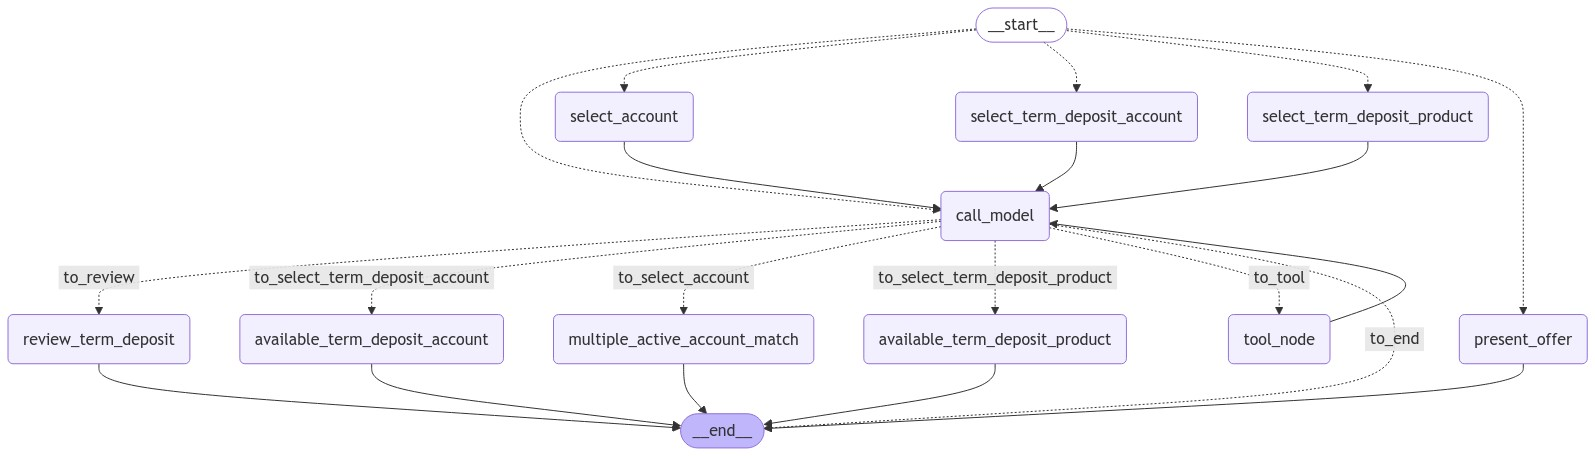

In [3]:
from IPython.display import Image, display

display(Image((await TermDepositGraph().get_graph()).draw_mermaid_png()))